In [16]:
import numpy
import pandas
import sys
from sklearn.decomposition import PCA as sklearnPCA
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import Chem, DataStructs
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

dataframe = pandas.read_csv("../pubchem_data/processed/pparg_ligand_data.txt",
                            sep="\t")
mols = []
fps = []

for index, row in dataframe.iterrows():
    mol = Chem.MolFromSmiles(row['SMILES'])
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    mols.append(mol)
    fps.append(fp)

np_fps = []
for fp in fps:
    arr = numpy.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

np_fps_array = numpy.array(np_fps)



C:\ProgramData\Anaconda3\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


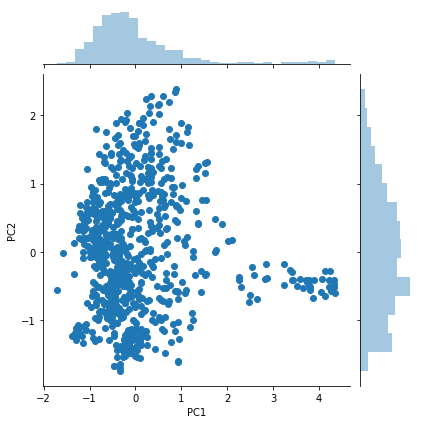

In [17]:
sklearn_pca = sklearnPCA(n_components=2)
y_sklearn = sklearn_pca.fit_transform(np_fps_array)
pccr = pandas.DataFrame(data=y_sklearn)
pccr.columns = ['PC1', 'PC2']
sns.jointplot(x="PC1", y="PC2", data=pccr)
plt.show()

In [10]:
sklearn_pca = sklearnPCA()
y_sklearn = sklearn_pca.fit_transform(np_fps_array)
pccr = pandas.DataFrame(data=y_sklearn)

In [18]:
pccr
explained_variance = sklearn_pca.explained_variance_ratio_  

In [19]:
explained_variance.shape

(2,)

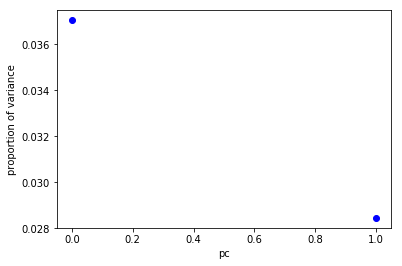

0.06549245014727426

In [22]:
import matplotlib.pyplot as plt
plt.plot(explained_variance,'bo')
plt.ylabel('proportion of variance')
plt.xlabel('pc')
plt.show()
explained_variance.sum()

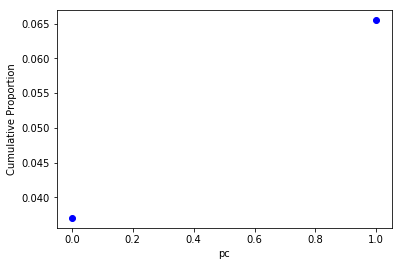

In [21]:
sum = 0
list=[]
for i in explained_variance : 
    sum += i
    list.append(sum)
plt.plot(list,'bo')
# plt.plot(list,)
plt.ylabel('Cumulative Proportion')
plt.xlabel('pc')
plt.show()